In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
LIKES_P = 0.08768846333333331
RETWEETS_P = 0.2729767066666667
REPLIES_P = 0.6393448333333334

def get_points(filename, encoding):
    df = pd.read_csv(filename, encoding=encoding)
    df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
    grouped_df = df.groupby("thread_number")
    group_sizes = grouped_df.size()
    df_engage = grouped_df[["retweets","likes","replies"]].sum()
    df_engage["thread_length"] = group_sizes

    avg_x = []
    avg_e = []
    for data in df_engage.iterrows():
        thread_length = data[1]["thread_length"]
        ahp = (data[1]["retweets"]*RETWEETS_P + data[1]["likes"]*LIKES_P + data[1]["replies"]*REPLIES_P)*1.0/thread_length
        avg_x.append(thread_length)
        avg_e.append(ahp)

    total_x = []
    total_e = []
    for data in df_engage.iterrows():
        thread_length = data[1]["thread_length"]
        ahp = (data[1]["retweets"]*RETWEETS_P + data[1]["likes"]*LIKES_P + data[1]["replies"]*REPLIES_P)
        total_x.append(thread_length)
        total_e.append(ahp)
    
    return avg_x, avg_e, total_x, total_e

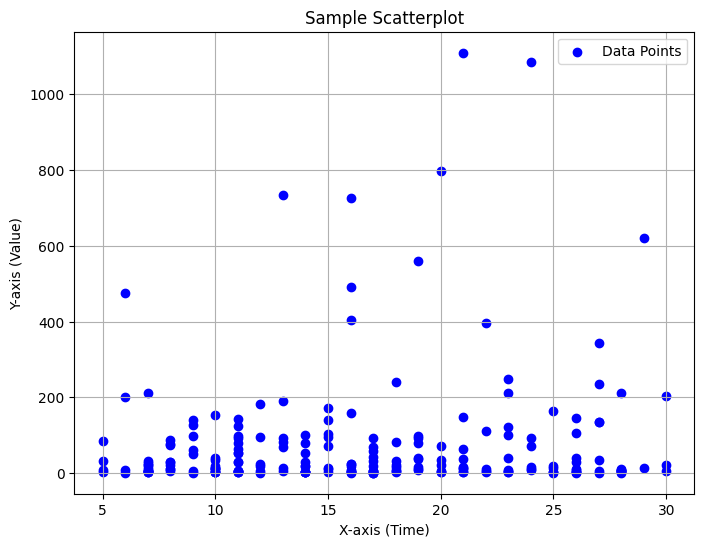

In [60]:
avg_x1, avg_e1, total_x1, total_e1 = get_points("./data/full_text_data/five_ten_url_full_text.csv", "ISO-8859-1")
avg_x2, avg_e2, total_x2, total_e2 = get_points("./data/full_text_data/ten_fifteen_url_full_text.csv", "ISO-8859-1")
avg_x3, avg_e3, total_x3, total_e3 = get_points("./data/full_text_data/fifteen_twenty_url_full_text.csv", "ISO-8859-1")
avg_x4, avg_e4, total_x4, total_e4 = get_points("./data/full_text_data/twenty_twentyfive_url_full_text.csv", "ISO-8859-1")
avg_x5, avg_e5, total_x5, total_e5 = get_points("./data/full_text_data/twentyfive_thirty_url_full_text.csv", "ISO-8859-1")

avg_x = avg_x1 + avg_x2 + avg_x3 + avg_x4 + avg_x5
avg_e = avg_e1 + avg_e2 + avg_e3 + avg_e4 + avg_e5
total_x = total_x1 + total_x2 + total_x3 + total_x4 + total_x5
total_e = total_e1 + total_e2 + total_e3 + total_e4 + total_e5

plt.figure(figsize=(8, 6))
plt.scatter(avg_x, avg_e, color='blue', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot

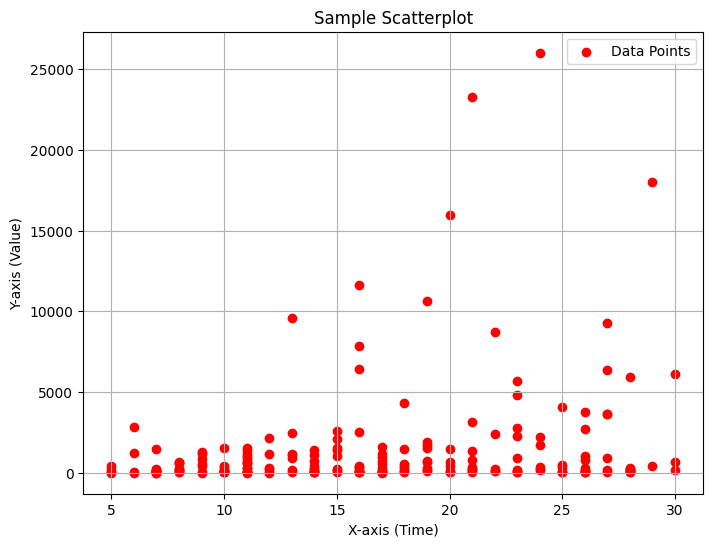

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(total_x, total_e, color='red', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot

In [51]:
df = pd.read_csv("./data/full_text_data/five_ten_url_full_text.csv", encoding="ISO-8859-1")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [9]:
df_followers = pd.read_csv("./data/five_ten.csv", encoding="ISO-8859-1")
df_followers.head()

,id,thread_number,timestamp,text,retweets,likes,replies,number_of_followers
0,999307110902050818,Thread 1,1527088356,Extraordinary evidence at Treasury committee f...,66,59,5,173199
1,999307395712143360,Thread 1,1527088424,The Brexiter favourite Max Fac - would cost bu...,83,107,10,173199
2,999307826265812992,Thread 1,1527088526,How does he arrive at the figure\r\r\n\r\r\n20...,6,11,2,173199
3,999308153346052102,Thread 1,1527088604,Theresa May's New Customs Partnership is much ...,7,10,1,173199
4,999308653894230022,Thread 1,1527088724,Mr Thompson said he did not expect the EU to r...,17,12,2,173199


In [49]:
like_p = 0.08768846333333331
retweets_p = 0.2729767066666667
replies_p = 0.6393448333333334

grouped_df = df.groupby("thread_number")
group_sizes = grouped_df.size()
df_engage = grouped_df[["retweets","likes","replies"]].sum()
df_engage["thread_length"] = group_sizes
df_engage

avg_x = []
avg_e = []
for data in df_engage.iterrows():
    thread_length = data[1]["thread_length"]
    ahp = (data[1]["retweets"]*retweets_p + data[1]["likes"]*like_p + data[1]["replies"]*replies_p)*1.0/thread_length
    avg_x.append(thread_length)
    avg_e.append(ahp)
# print(avg_e)
# print(avg_x)
# largest_value = max(avg_e)

# # Find the index of the largest value
# index_of_largest = avg_e.index(largest_value)
# print(index_of_largest)
# df_engage.head(35)

total_x = []
total_e = []
for data in df_engage.iterrows():
    thread_length = data[1]["thread_length"]
    ahp = (data[1]["retweets"]*retweets_p + data[1]["likes"]*like_p + data[1]["replies"]*replies_p)
    total_x.append(thread_length)
    total_e.append(ahp)

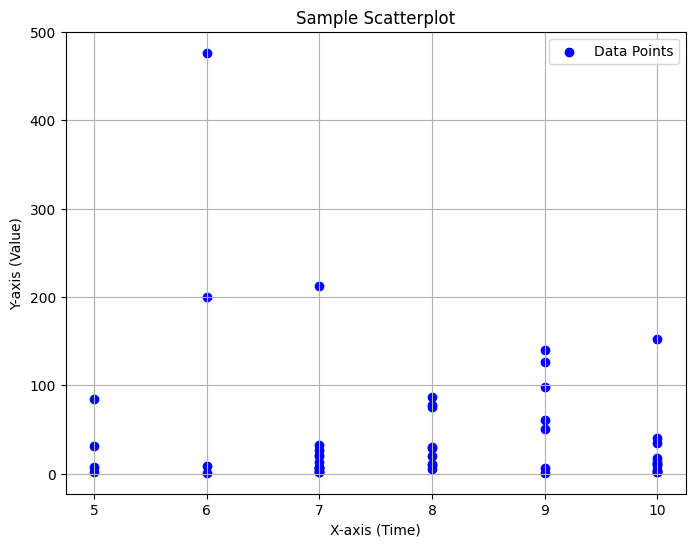

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(avg_x, avg_e, color='blue', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot

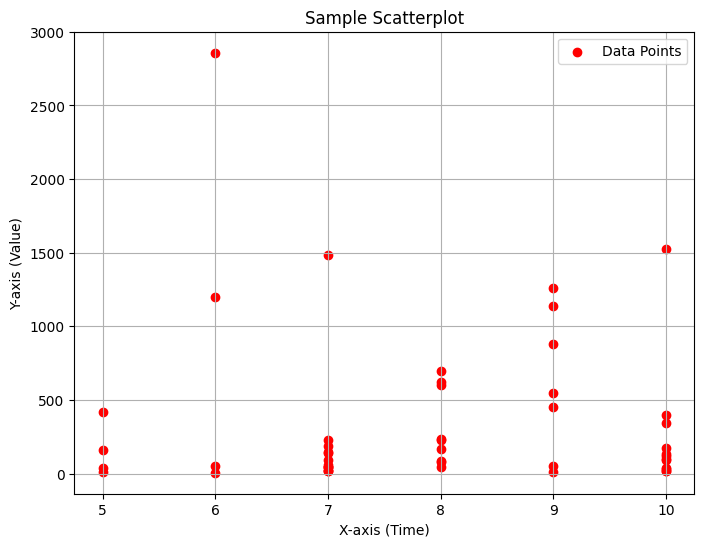

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(total_x, total_e, color='red', label='Data Points')  # Scatter plot with custom color, marker, and size

# Customize plot
plt.title("Sample Scatterplot")  # Title of the plot
plt.xlabel("X-axis (Time)")  # Label for the x-axis
plt.ylabel("Y-axis (Value)")  # Label for the y-axis
plt.grid(True)  # Add grid lines
plt.legend()  # Display the legend
plt.show()  # Display the scatterplot